<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/project_sy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
#DATA_SOURCE_MAPPING = 'cifake-real-and-ai-generated-synthetic-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3041726%2F5256696%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T065729Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6c684e57ccb8384b0703e544ae35155c6333360ffaca3a834646626f08ec95cadd5ed04731d574024a0244abb053e2c7c1240fc4f1873d06aa12791bd0765682c5c39b22778dcde67cfb4677019d9baad079e5465f51eee12d0e5c370ba5afac5e92f008817cf32b37f49fd91115b10baf31dc8a0b070f79d0b94cb80c03978ae9a361dff5cc86532ef009e53312d634e33eb0cd363a17da532b8e97231eb8ebcd19d0c94eeead784f7bff842d5b9a6066be69d255aa04297825656e22ef9570abb32b029cd2f63f75d682ad8040239c2e340c98a606f841082ce2ee71a139c93c52a1477de66a484533f69eeb360eab126e087706f8bdd11e30bc6d4e9af89f,ai-generated-images-vs-real-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4423404%2F7598969%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T065729Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D745082cefb831d02e87a3e8292f1e723519e11f9c9b75db0102d400849d51a8369a8caa8b67318e05e4141cbd80465252f9dc8e8a3d4d5295559f6598e0306c6bcd42ed80a774c7f4560604a76f874062f3a81eeae6c32fd0cb81c9911c7f037d4c0ff84a9cb3552c57764dbf28d83392148d9f5b6b5e18ef7b79ac81ae46bd768269fa8c60679bf6d5d31cd779eebe7fdc556a9b92479cf91bf2b6a0314c13ee7abc2edcf40583286c38c2d466856c536b4f7a4ede6d65b130f292509d3e341bd5aeb0ab363d94ff5fb499f626d5fa498181c176e0ba5822be5fb8d94de31ab3c5658acbc3997864f1cbdcf52cc4f3bf2261dfb64b0b54a1df165bff798eb1f'
DATA_SOURCE_MAPPING = 'cifake-real-and-ai-generated-synthetic-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3041726%2F5256696%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240524%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240524T160053Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D45f84f9268a230de6017b9dbcc20d861fd507b19d2602ec52c03f49496962d9b1a4377bf5b2261ee54dd1a242a64725a52c668630f626081525ab3645e74d2d31847f3fd5eb57029599ccc5b32392d7c2f880143b58ebb5fe1ff97170ebaa825dd8220f1eda7838e41b3cf235f1d4a119c6c749fb5d8ff9bcdf2a4afe9c51cb421287f096abe40b90dc5c88dda92109574347293b25dc1981e4471307aa9bb48d99dda96f7e0447e0f4342b89bc6ca322d05a50abf6afbd1c6b048e13edd47bbf5d1ae459e43c1c45da8928229dd4e7b3aff8d428749608c136878b29d5f2656844b6eaa86c362ed2b1076e07921335f152698afd8a87982584ffc6e88ccd92b'

KAGGLE_INPUT_PATH='/content/kaggle/input'
KAGGLE_WORKING_PATH='/content/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 109625224 bytes downloaded
Downloaded and uncompressed: cifake-real-and-ai-generated-synthetic-images
Data source import complete.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Fine-tuning CNN - 97.08% made by ACHAL GUPTA 를 참고함   
https://www.kaggle.com/code/guptaachal02/fine-tuning-cnn-97-08   
Apache Licence 적용을 받음   

**데이터 처리**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [5]:
#dataset_dir1 = "/content/kaggle/input/ai-generated-images-vs-real-images/"
dataset_dir2 = "/content/kaggle/input/cifake-real-and-ai-generated-synthetic-images/" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir2)

Loading dataset from: /content/kaggle/input/cifake-real-and-ai-generated-synthetic-images/


In [6]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
img_height = 64
img_width = 64
batch_size = 300
#dir1_1 = tf.keras.utils.image_dataset_from_directory(
 # dataset_dir1 + "/AiArtData",
 # seed = 512,
 # image_size = (img_height, img_width),
 # batch_size = batch_size)

#dir1_2 = tf.keras.utils.image_dataset_from_directory(
 # dataset_dir1 + "/RealArt",
 # seed = 512,
 # image_size = (img_height, img_width),
 # batch_size = batch_size)


def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label
# 데이터셋에 변환 함수 적용
#dir1_2 = dir1_2.map(set_labels_to_value)


dir2_1 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir2 + "/train",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir2_2 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir2 + "/test",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)


#for i, l in dir1_1.take(5):
#  print("label:",l)
#dir1_dataset = dir1_1.concatenate(dir1_2)
#print(len(dir1_dataset))
#dir2_dataset = dir2_1.concatenate(dir2_2)
#final_dataset = dir1_dataset.concatenate(dir2_dataset)
final_dataset = dir2_1.concatenate(dir2_2)




Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [8]:

for i, l in dir2_2.take(5):
  print("label:",l)

label: tf.Tensor(
[0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 1], shape=(300,), dtype=int32)
label: tf.Tensor(
[0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0

In [9]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [10]:
len(final_shuffled_dataset)

401

In [11]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 256
validation_dataset size: 64
test_dataset size 81


**ResNet 모델로 Transfer Learning**

In [12]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256   

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

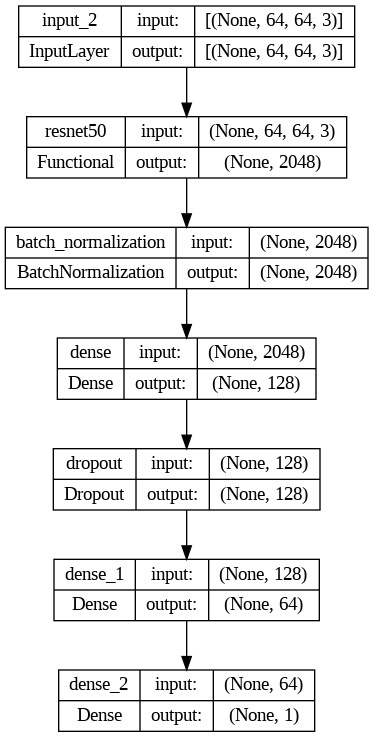

In [14]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [15]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 40,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/40
256/256 [==============================] - 87s 186ms/step - loss: 1.4361 - accuracy: 0.9066 - precision: 0.9039 - recall: 0.9101 - val_loss: 3.0589 - val_accuracy: 0.5132 - val_precision: 1.0000 - val_recall: 0.0306
Epoch 2/40
256/256 [==============================] - 45s 166ms/step - loss: 0.4500 - accuracy: 0.9413 - precision: 0.9439 - recall: 0.9381 - val_loss: 1.4162 - val_accuracy: 0.6033 - val_precision: 0.9995 - val_recall: 0.1997
Epoch 3/40
256/256 [==============================] - 46s 170ms/step - loss: 0.2513 - accuracy: 0.9489 - precision: 0.9528 - recall: 0.9442 - val_loss: 0.2512 - val_accuracy: 0.9359 - val_precision: 0.9831 - val_recall: 0.8867
Epoch 4/40
256/256 [==============================] - 43s 159ms/step - loss: 0.1939 - accuracy: 0.9531 - precision: 0.9585 - recall: 0.9470 - val_loss: 0.2158 - val_accuracy: 0.9412 - val_precision: 0.9698 - val_recall: 0.9108
Epoch 5/40
256/256 [=============

In [16]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

64/64 [==============================] - 5s 41ms/step - loss: 0.0297 - accuracy: 0.9951 - precision: 0.9985 - recall: 0.9916
Val Loss: 0.0297
Val Accuracy: 0.9951
Val Precision: 0.9985
Val Recall: 0.9916


In [17]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

81/81 [==============================] - 6s 41ms/step - loss: 0.0279 - accuracy: 0.9954 - precision: 0.9993 - recall: 0.9915
test Loss: 0.0279
test Accuracy: 0.9954
test Precision: 0.9993
test Recall: 0.9915


In [18]:
#모델 저장
ResNet_model.save('ResNet_c_model.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model.h5')

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# ResNet50 모델 불러오기 (ImageNet 가중치 사용)

# 이미지 파일 경로
img_path = '/content/drive/MyDrive/images/Real/11.png'  # 여기에 실제 이미지 파일 경로를 입력하세요.



# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 예측 수행
preds = ResNet_model.predict(x)

# 결과 디코딩 및 출력
print('Predicted:', preds)

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/Real/11.png'

In [21]:
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(dir2_1)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")


334/334 [==============================] - 15s 41ms/step - loss: 0.0277 - accuracy: 0.9955 - precision: 0.9989 - recall: 0.9920
test Loss: 0.0277
test Accuracy: 0.9955
test Precision: 0.9989
test Recall: 0.9920


In [23]:
result_show(ResNet_model,dir2_1)

NameError: name 'result_show' is not defined

In [ ]:
#테스ㅌ
dir = '/content/drive/MyDrive/이미지 데이터셋 폴더'

rt= tf.keras.utils.image_dataset_from_directory(
  dir,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 10)


def result_show(model,test_dataset):
  result = model.predict(test_dataset)
  cnt = 0
  for images ,labels in test_dataset.take(50):
    plt.figure(figsize=(10,10))
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      if int(labels[i]) == 0:
        isReal = 'Fake'
      else:
        isReal = 'Real'

      if result[cnt][0] >= 0.5:
        a = "Real"
      else :
        a = 'Fake'

      plt.title(f"{isReal} -> {a}")
      cnt +=1
      plt.axis("off")
    plt.show()
  test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

  print(f"test Loss: {test_loss:.4f}")
  print(f"test Accuracy: {test_accuracy:.4f}")
  print(f"test Precision: {test_precision:.4f}")
  print(f"test Recall: {test_recall:.4f}")

result_show(ResNet_model,rt)

**VGG16 모델**

In [ ]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



In [ ]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [ ]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

In [ ]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [ ]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

validation_dataset으로 검증

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

테스트셋으로 검증

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

In [ ]:
result_show(VGG_model,validation_dataset)

**EfficientNet모델**

In [ ]:
# Building the Transfer Learning model using EfficientNetV2B0
EfficientNet_base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
EfficientNet_base_model.trainable = True

# Create a new model on top of the EfficientNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = EfficientNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
EfficientNet_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
EfficientNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
EfficientNet_model.summary()

In [ ]:
# Visualize the EfficientNet model architecture
tf.keras.utils.plot_model(EfficientNet_model, show_shapes = True, to_file = 'EfficientNet_model.png')
Image('EfficientNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using EfficientNet...")
EfficientNet_model_history = EfficientNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

**MobileNet 모델로 Transfer Learning**

In [ ]:
# Building the Transfer Learning model using MobileNetV3
MobileNet_base_model = tf.keras.applications.MobileNetV3Small(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
MobileNet_base_model.trainable = True

In [ ]:
# Create a new model on top of the MobileNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = MobileNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
MobileNet_model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the Transfer Learning model
MobileNet_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
MobileNet_model.summary()

In [ ]:
# Visualize the MobileNet model architecture
tf.keras.utils.plot_model(MobileNet_model, show_shapes = True, to_file = 'MobileNet_model.png')
Image('MobileNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using MobileNet...")
MobileNet_model_history = MobileNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = MobileNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = MobileNet_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")